In [1]:
import pandas as pd

In [2]:
db_data = pd.read_csv("uniprotlinks.csv")

In [3]:
unip_data = pd.read_csv("uniprot-all2.csv")

In [4]:
print(db_data.head())

  DrugBank ID       Name         Type UniProt ID  \
0     DB00001  Lepirudin  BiotechDrug     P00734   
1     DB00002  Cetuximab  BiotechDrug     P00533   
2     DB00002  Cetuximab  BiotechDrug     O75015   
3     DB00002  Cetuximab  BiotechDrug     P00736   
4     DB00002  Cetuximab  BiotechDrug     P02745   

                                        UniProt Name  
0                                        Prothrombin  
1                   Epidermal growth factor receptor  
2  Low affinity immunoglobulin gamma Fc region re...  
3                        Complement C1r subcomponent  
4              Complement C1q subcomponent subunit A  


In [5]:
print(unip_data.head())

    Entry            Gene names  Length  \
0  Q13542              EIF4EBP2     120   
1  Q5TYW2    ANKRD20A1 ANKRD20A     823   
2  A0PJZ0  ANKRD20A5P ANKRD20A5     165   
3  A7E2S9  ANKRD30BL NCRNA00164     258   
4  P29275               ADORA2B     332   

                                       Protein names  
0  Eukaryotic translation initiation factor 4E-bi...  
1      Ankyrin repeat domain-containing protein 20A1  
2  Putative ankyrin repeat domain-containing prot...  
3  Putative ankyrin repeat domain-containing prot...  
4                             Adenosine receptor A2b  


In [6]:
df = db_data.rename(columns={'Name': 'Drug Name', 'UniProt Name': 'Protein Name'})

In [7]:
print(df.head())

  DrugBank ID  Drug Name         Type UniProt ID  \
0     DB00001  Lepirudin  BiotechDrug     P00734   
1     DB00002  Cetuximab  BiotechDrug     P00533   
2     DB00002  Cetuximab  BiotechDrug     O75015   
3     DB00002  Cetuximab  BiotechDrug     P00736   
4     DB00002  Cetuximab  BiotechDrug     P02745   

                                        Protein Name  
0                                        Prothrombin  
1                   Epidermal growth factor receptor  
2  Low affinity immunoglobulin gamma Fc region re...  
3                        Complement C1r subcomponent  
4              Complement C1q subcomponent subunit A  


In [8]:
df_2 = unip_data.rename(columns={'Entry': 'UniProt ID', 'Protein names': 'Protein Name', 'Gene names': 'Gene Symbol'})

In [9]:
print(df_2.head())

  UniProt ID           Gene Symbol  Length  \
0     Q13542              EIF4EBP2     120   
1     Q5TYW2    ANKRD20A1 ANKRD20A     823   
2     A0PJZ0  ANKRD20A5P ANKRD20A5     165   
3     A7E2S9  ANKRD30BL NCRNA00164     258   
4     P29275               ADORA2B     332   

                                        Protein Name  
0  Eukaryotic translation initiation factor 4E-bi...  
1      Ankyrin repeat domain-containing protein 20A1  
2  Putative ankyrin repeat domain-containing prot...  
3  Putative ankyrin repeat domain-containing prot...  
4                             Adenosine receptor A2b  


In [10]:
df.shape

(16168, 5)

In [11]:
df_2.shape

(159552, 4)

In [12]:
##Chaning the type of column "Gene Symbol" to list. 

Gene_sym = df_2["Gene Symbol"].tolist()

In [13]:
what_i_want = []

In [14]:
##Splitting data into list of lists using space delimiter. 

for id_ in Gene_sym:
    temp = str(id_).split(' ')
    what_i_want.append(temp)
    

In [15]:
#Trimming off Gene Symbol Aliases 

what_i_actually_want = [id_pair[0] for id_pair in what_i_want]  ##list comprehensions 

In [16]:
print(type(what_i_actually_want))

<class 'list'>


In [17]:
s = pd.Series(what_i_actually_want)  ##turning the list of values into a series.

In [18]:
df_2['Gene Symbol'] = s.values   ##adding that series to the dataframe. 

In [19]:
print(df_2.head())

  UniProt ID Gene Symbol  Length  \
0     Q13542    EIF4EBP2     120   
1     Q5TYW2   ANKRD20A1     823   
2     A0PJZ0  ANKRD20A5P     165   
3     A7E2S9   ANKRD30BL     258   
4     P29275     ADORA2B     332   

                                        Protein Name  
0  Eukaryotic translation initiation factor 4E-bi...  
1      Ankyrin repeat domain-containing protein 20A1  
2  Putative ankyrin repeat domain-containing prot...  
3  Putative ankyrin repeat domain-containing prot...  
4                             Adenosine receptor A2b  


In [20]:
db_data.join(df_2, on='UniProt ID', lsuffix='left', rsuffix='right')  ##don't use join, it doesn't work!

,DrugBank ID,Name,Type,UniProt IDleft,UniProt Name,UniProt IDright,Gene Symbol,Length,Protein Name
0,DB00001,Lepirudin,BiotechDrug,P00734,Prothrombin,NaN,NaN,NaN,NaN
1,DB00002,Cetuximab,BiotechDrug,P00533,Epidermal growth factor receptor,NaN,NaN,NaN,NaN
2,DB00002,Cetuximab,BiotechDrug,O75015,Low affinity immunoglobulin gamma Fc region re...,NaN,NaN,NaN,NaN
3,DB00002,Cetuximab,BiotechDrug,P00736,Complement C1r subcomponent,NaN,NaN,NaN,NaN
4,DB00002,Cetuximab,BiotechDrug,P02745,Complement C1q subcomponent subunit A,NaN,NaN,NaN,NaN
5,DB00002,Cetuximab,BiotechDrug,P02746,Complement C1q subcomponent subunit B,NaN,NaN,NaN,NaN
6,DB00002,Cetuximab,BiotechDrug,P02747,Complement C1q subcomponent subunit C,NaN,NaN,NaN,NaN
7,DB00002,Cetuximab,BiotechDrug,P08637,Low affinity immunoglobulin gamma Fc region re...,NaN,NaN,NaN,NaN
8,DB00002,Cetuximab,BiotechDrug,P09871,Complement C1s subcomponent,NaN,NaN,NaN,NaN
9,DB00002,Cetuximab,BiotechDrug,P12314,High affinity immunoglobulin gamma Fc receptor I,NaN,NaN,NaN,NaN


In [21]:
##Using merge to merge two dataframes and map the UniProt Id to Gene Symbol. 

combined_df = db_data.merge(df_2, how="left")

In [22]:
combined_df.head()

,DrugBank ID,Name,Type,UniProt ID,UniProt Name,Gene Symbol,Length,Protein Name
0,DB00001,Lepirudin,BiotechDrug,P00734,Prothrombin,F2,622.0,Prothrombin (EC 3.4.21.5) (Coagulation factor ...
1,DB00002,Cetuximab,BiotechDrug,P00533,Epidermal growth factor receptor,EGFR,1210.0,Epidermal growth factor receptor (EC 2.7.10.1)...
2,DB00002,Cetuximab,BiotechDrug,O75015,Low affinity immunoglobulin gamma Fc region re...,FCGR3B,233.0,Low affinity immunoglobulin gamma Fc region re...
3,DB00002,Cetuximab,BiotechDrug,P00736,Complement C1r subcomponent,C1R,705.0,Complement C1r subcomponent (EC 3.4.21.41) (Co...
4,DB00002,Cetuximab,BiotechDrug,P02745,Complement C1q subcomponent subunit A,C1QA,245.0,Complement C1q subcomponent subunit A


In [23]:
##rename 'Name' column in combined_df to 'Drug Name' and 'Type' column to 'Drug Type'.

combined_df2 = combined_df.rename(columns={'Name': 'Drug Name', 'Type': 'Drug Type', 'UniProt Name': 'Protein Names'})

In [24]:
combined_df2.head()

,DrugBank ID,Drug Name,Drug Type,UniProt ID,Protein Names,Gene Symbol,Length,Protein Name
0,DB00001,Lepirudin,BiotechDrug,P00734,Prothrombin,F2,622.0,Prothrombin (EC 3.4.21.5) (Coagulation factor ...
1,DB00002,Cetuximab,BiotechDrug,P00533,Epidermal growth factor receptor,EGFR,1210.0,Epidermal growth factor receptor (EC 2.7.10.1)...
2,DB00002,Cetuximab,BiotechDrug,O75015,Low affinity immunoglobulin gamma Fc region re...,FCGR3B,233.0,Low affinity immunoglobulin gamma Fc region re...
3,DB00002,Cetuximab,BiotechDrug,P00736,Complement C1r subcomponent,C1R,705.0,Complement C1r subcomponent (EC 3.4.21.41) (Co...
4,DB00002,Cetuximab,BiotechDrug,P02745,Complement C1q subcomponent subunit A,C1QA,245.0,Complement C1q subcomponent subunit A


In [25]:
##deleting 'Protein Name' column because it's the same as 'Protein Names' column. 

del combined_df2["Protein Name"]

In [26]:
combined_df2.head()

,DrugBank ID,Drug Name,Drug Type,UniProt ID,Protein Names,Gene Symbol,Length
0,DB00001,Lepirudin,BiotechDrug,P00734,Prothrombin,F2,622.0
1,DB00002,Cetuximab,BiotechDrug,P00533,Epidermal growth factor receptor,EGFR,1210.0
2,DB00002,Cetuximab,BiotechDrug,O75015,Low affinity immunoglobulin gamma Fc region re...,FCGR3B,233.0
3,DB00002,Cetuximab,BiotechDrug,P00736,Complement C1r subcomponent,C1R,705.0
4,DB00002,Cetuximab,BiotechDrug,P02745,Complement C1q subcomponent subunit A,C1QA,245.0


In [27]:
#exporting the dataframe to csv file. 

"""combined_df2.to_csv('drug_gene.csv')"""

"combined_df2.to_csv('drug_gene.csv')"

In [28]:
#selecting only the columns you want and combining them into a new column as a tuple in combined_df2.

combined_df2['drug_gene'] = list(zip(combined_df2['Drug Name'], combined_df2['Gene Symbol']))

In [29]:
##is_rows_empty = combined_df2["Gene Symbol"] == ' '                                               ## did not work! 

In [30]:
##combined_df2[is_rows_empty] = 'nan'                                                              ## did not work!

In [31]:
##dict_ = dict(zip(combined_df2['Drug Name'], combined_df2['Gene symbol']))                        ## did not work!

In [32]:
combined_df2.head()

,DrugBank ID,Drug Name,Drug Type,UniProt ID,Protein Names,Gene Symbol,Length,drug_gene
0,DB00001,Lepirudin,BiotechDrug,P00734,Prothrombin,F2,622.0,"(Lepirudin, F2)"
1,DB00002,Cetuximab,BiotechDrug,P00533,Epidermal growth factor receptor,EGFR,1210.0,"(Cetuximab, EGFR)"
2,DB00002,Cetuximab,BiotechDrug,O75015,Low affinity immunoglobulin gamma Fc region re...,FCGR3B,233.0,"(Cetuximab, FCGR3B)"
3,DB00002,Cetuximab,BiotechDrug,P00736,Complement C1r subcomponent,C1R,705.0,"(Cetuximab, C1R)"
4,DB00002,Cetuximab,BiotechDrug,P02745,Complement C1q subcomponent subunit A,C1QA,245.0,"(Cetuximab, C1QA)"


In [33]:
drug_gene_col = combined_df2["drug_gene"]

In [34]:
print(drug_gene_col.head())

0        (Lepirudin, F2)
1      (Cetuximab, EGFR)
2    (Cetuximab, FCGR3B)
3       (Cetuximab, C1R)
4      (Cetuximab, C1QA)
Name: drug_gene, dtype: object


In [35]:
import networkx as nx

In [36]:
import matplotlib.pyplot as plt

In [37]:
import numpy as np

In [38]:
from networkx.algorithms import bipartite 

In [39]:
##G=nx.read_edgelist(drug_gene_col, delimiter=',', nodetype=str)  ##'tuple' object has no attribute 'decode' error

In [40]:
##Use this script to avoid error message by networkx. 

##nx.draw_networkx(G)      

In [41]:
drug_gene_col[455]

('Pyridoxal Phosphate', 'AGXT2')

In [42]:
class Drug_gene():
    def __init__(self, data):
        self.data = combined_df2

In [43]:
class Drug_gene():
    def __init__(self, drug, gene):
        self.drug = data[:1]
        self.gene = data[:5]

In [44]:
##Turning the tuple list column named 'drug_gene' into a dictionary quick and easy way! 
##Turns out I don't need to do this. 

#dict_ = dict(combined_df2['drug_gene'])

In [45]:
gene_sym = combined_df2["Gene Symbol"]

In [46]:
gene_sym_isnull = pd.isnull(gene_sym)

In [47]:
gene_sym_nulltrue = gene_sym[gene_sym_isnull]

In [48]:
print(len(gene_sym_nulltrue))

4140


In [49]:
gene_sym_nullfalse = gene_sym[gene_sym_isnull == False]

In [50]:
gene_sym_nullfalse.shape

(12028,)

In [51]:
##Dropping rows with empty columns in Gene Symbol. 

combined_df2.dropna(subset=['Gene Symbol'], inplace=True)

In [52]:
combined_df2.shape

(12028, 8)

In [53]:
G = nx.Graph()

In [54]:
##Turning the tuples column 'drug_gene' to lists. 

edges = combined_df2["drug_gene"].tolist()

In [55]:
G.add_edges_from(edges)

In [56]:
G.edges()

[('Lepirudin', 'F2'),
 ('F2', 'Bivalirudin'),
 ('F2', 'Drotrecogin alfa'),
 ('F2', 'Coagulation Factor IX (Recombinant)'),
 ('F2', 'Menadione'),
 ('F2', 'Argatroban'),
 ('F2', 'Proflavine'),
 ('F2', 'Beta-(2-Naphthyl)-Alanine'),
 ('F2', 'Hemi-Babim'),
 ('F2', '2-(2-Hydroxy-Phenyl)-1h-Benzoimidazole-5-Carboxamidine'),
 ('F2',
  '4-Oxo-2-Phenylmethanesulfonyl-Octahydro-Pyrrolo[1,2-a]Pyrazine-6-Carboxylic Acid [1-(N-Hydroxycarbamimidoyl)-Piperidin-4-Ylmethyl]-Amide'),
 ('F2', '4-Iodobenzo[B]Thiophene-2-Carboxamidine'),
 ('F2', 'CRA_8696'),
 ('F2', 'Gamma-Carboxy-Glutamic Acid'),
 ('F2', '6-Chloro-2-(2-Hydroxy-Biphenyl-3-Yl)-1h-Indole-5-Carboxamidine'),
 ('F2', 'Lysophosphotidylserine'),
 ('F2',
  'N-{2,2-DIFLUORO-2-[(2R)-PIPERIDIN-2-YL]ETHYL}-2-[2-(1H-1,2,4-TRIAZOL-1-YL)BENZYL][1,3]OXAZOLO[4,5-C]PYRIDIN-4-AMINE'),
 ('F2',
  'TRANS-4-(GUANIDINOMETHYL)-CYCLOHEXANE-L-YL-D-3-CYCLOHEXYLALANYL-L-AZETIDINE-2-YL-D-TYROSINYL-L-HOMOARGININAMIDE'),
 ('F2',
  '2-(3-CHLORO-6-{[2,2-DIFLUORO-2-(1-OXIDOP

In [57]:
##finding the degree of each nodes (both drugs and genes)

degree_distribution = G.degree()

In [58]:
len(degree_distribution.keys())

7191

In [59]:
degree_distribution['F7']

12

In [60]:
%matplotlib inline

In [61]:
#plt.bar(list(degree_distribution.keys()), degree_distribution.values(), color='r')

#results in: unsupported operand type(s) for -: 'str' and 'float'


In [62]:
from numpy import arange

In [63]:
unique = len(set(degree_distribution.values()))
print(unique)

74


In [64]:
B = nx.Graph()

In [65]:
B.add_nodes_from(combined_df2['Drug Name'], bipartite=0)

In [66]:
B.add_nodes_from(combined_df2['Gene Symbol'], bipartite=1)

In [67]:
B.add_edges_from([(row['Drug Name'], row['Gene Symbol']) for idx, row in combined_df2.iterrows()])

In [68]:
B.edges()

[('Lepirudin', 'F2'),
 ('Cetuximab', 'EGFR'),
 ('Cetuximab', 'FCGR3B'),
 ('Cetuximab', 'C1R'),
 ('Cetuximab', 'C1QA'),
 ('Cetuximab', 'C1QB'),
 ('Cetuximab', 'C1QC'),
 ('Cetuximab', 'FCGR3A'),
 ('Cetuximab', 'C1S'),
 ('Cetuximab', 'FCGR1A'),
 ('Cetuximab', 'FCGR2A'),
 ('Cetuximab', 'FCGR2B'),
 ('Cetuximab', 'FCGR2C'),
 ('Denileukin diftitox', 'IL2RA'),
 ('Denileukin diftitox', 'IL2RB'),
 ('Denileukin diftitox', 'IL2RG'),
 ('Etanercept', 'TNF'),
 ('Etanercept', 'TNFRSF1B'),
 ('Etanercept', 'FCGR1A'),
 ('Etanercept', 'FCGR3A'),
 ('Etanercept', 'FCGR2A'),
 ('Etanercept', 'FCGR2B'),
 ('Etanercept', 'FCGR2C'),
 ('Etanercept', 'LTA'),
 ('Etanercept', 'FCGR3B'),
 ('Etanercept', 'C1S'),
 ('Etanercept', 'C1R'),
 ('Etanercept', 'C1QA'),
 ('Etanercept', 'C1QB'),
 ('Etanercept', 'C1QC'),
 ('Bivalirudin', 'F2'),
 ('Leuprolide', 'GNRHR'),
 ('Peginterferon alfa-2a', 'IFNAR2'),
 ('Peginterferon alfa-2a', 'IFNAR1'),
 ('Alteplase', 'PLG'),
 ('Alteplase', 'FGA'),
 ('Alteplase', 'PLAUR'),
 ('Alteplase', '

In [69]:
nx.is_connected(B)

False

In [70]:
#separating the two sets of nodes, drugs and genes. 

d, g = bipartite.sets(B)

In [71]:
#list(d)                """to display drugs"""

In [72]:
len(d)

4923

In [73]:
#list(g)                   """to display genes"""

In [74]:
len(g)

2268

In [75]:
len(set(combined_df2['Gene Symbol']))

2268

In [76]:
len(set(combined_df2['Drug Name']))

4923

In [77]:
##combined degree distribution of bipartite graph B.

degree_distribution2 = B.degree()

In [78]:
c = bipartite.clustering(B)             #clustering coefficient

In [79]:
avg_c = bipartite.average_clustering(B)                          #average clustering coeff

In [80]:
avg_c

0.4761818878468815

In [81]:
#top_nodes = set(n for n,d in B.nodes(data=True) if d['bipartite']==0)
#bottom_nodes = set(B) - top_nodes

In [82]:
array1 = np.array(list(g))

In [83]:
#changing the set of drugs to numpy arrays

array2 = np.asarray(list(d))                                

In [84]:
#projection of B graph onto drug_nodes

d_nodes = bipartite.projected_graph(B, d)                     

In [85]:
g_nodes = bipartite.projected_graph(B, g)                     

In [86]:
##degree distribution of genes nodes only

genes_degree = g_nodes.degree()               

In [87]:
##degree distribution of drugs nodes only

drugs_degree = d_nodes.degree()

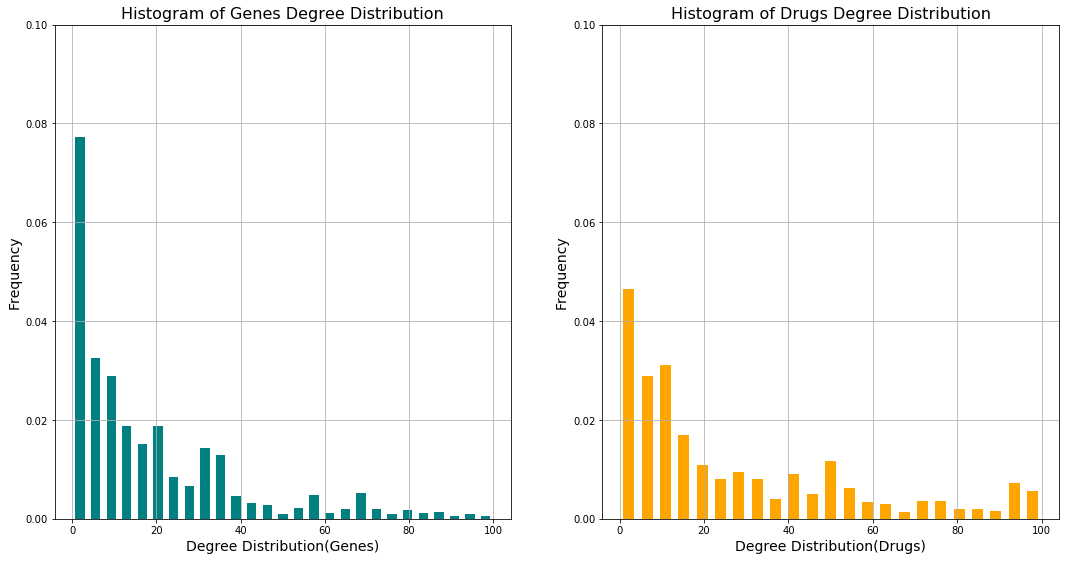

In [88]:
fig = plt.figure(figsize=(18,20))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
degrees1 = [item[1] for item in list(genes_degree.items())]      ##genes
degrees2 = [item[1] for item in list(drugs_degree.items())]    ##drugs

ax1.set_ylim(0,0.1)
ax1.set_xlabel('Degree Distribution(Genes)', size=14)
ax1.set_ylabel('Frequency', size=14)
ax1.set_title('Histogram of Genes Degree Distribution', size=16)
ax1.hist(degrees1, bins='auto', range=(0,100), color='teal', rwidth=0.6, normed=1)

ax2.set_ylim(0,0.1)
ax2.set_xlabel('Degree Distribution(Drugs)', size=14)
ax2.set_ylabel('Frequency', size=14)
ax2.set_title('Histogram of Drugs Degree Distribution', size=16)
ax2.hist(degrees2, bins='auto', range=(0,100), color='orange', rwidth=0.6, normed=1)

ax1.grid(True)
ax2.grid(True)
plt.show()

#bins=range(min(degrees1), max(degrees1)

In [89]:
##finding corresponding max. value key in a dict. 

max(degree_distribution2, key=degree_distribution2.get)                 

'NADH'

In [90]:
degree_distribution2['NADH']

144

In [91]:
print(type(B))

<class 'networkx.classes.graph.Graph'>


In [102]:
print(array2.shape)

(4923,)


In [103]:
print(array1.shape)

(2268,)


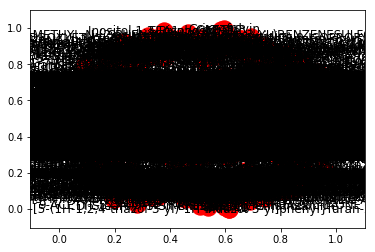

In [109]:
nx.draw_networkx(B)

In [110]:
biadjacency_matrix(B)

NameError: name 'biadjacency_matrix' is not defined